<a href="https://colab.research.google.com/github/Shibasish-Shaw/Sentiment-Analysis-of-Stocks/blob/main/Stock_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Stock-Sentiment-Analysis/master/Data.csv', encoding = "ISO-8859-1")


In [ ]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
# Removing punctuations
data=train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# Numbering the columns
list1 = [i for i in range(25)]
new_index = [str(i) for i in list1]
data.columns = new_index
# Converting the text in lower case
for index in new_index:
    data[index] = data[index].str.lower()

In [ ]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))

In [ ]:
headlines[675]

'millar  sorry  for vuelta protest verdict on the season  the heroes and zeros and hopes for next year fa ups its stake in new wembley to     m fletcher poised to sign new contract this is personal battle of the bulge my new media new media diary television s dating game media monkey news real race row victory local radio for local people getting broadband off the launch pad my media itv looks to plan b the man who lured dawn airey to sky explains how he did it   and why round up spurs must see that keane is not a front runner ipswich on road to riches via lips of matt holland al fayed  the spy chief and a festering    year old feud boston s up european round up west ham       manchester city manchester united       tottenham hotspur'

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
countvector = CountVectorizer(ngram_range=(2, 2))
train_dataset = countvector.fit_transform(headlines)

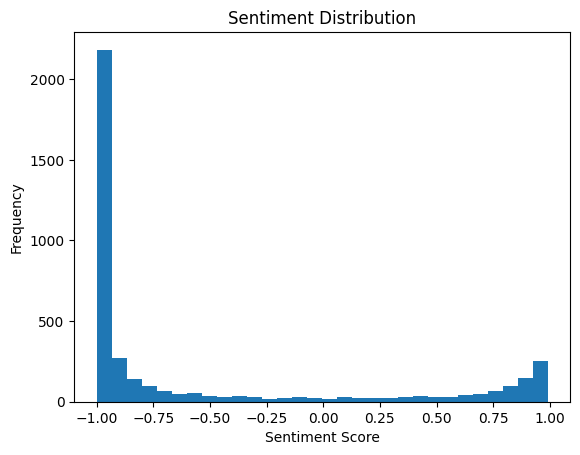

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt



# Calculating sentiment scores for headlines using VaderSentiment
vader = SentimentIntensityAnalyzer()
sentiment_scores = []
for headline in headlines:
    sentiment_scores.append(vader.polarity_scores(headline)['compound'])

# Plotting the sentiment distribution
plt.hist(sentiment_scores, bins=30)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()




In [ ]:
# Identifying the most positive and negative headlines
df_train = pd.DataFrame({'headline': headlines, 'sentiment_score': sentiment_scores})
df_train.sort_values(by='sentiment_score', inplace=True)
print("Most positive headline: ")
print(df_train.iloc[-1]['headline'])



Most positive headline: 
italy proposes law that will ban people from the internet based on single accusation of infringement from anyone oktoberfest       pics   a us court has overturned a block on ecuadoreans collecting damages totalling      bn from chevron over amazon oil pollution world s deadliest volcano rumbles   it blew up two centuries ago with    times the force of krakatoa and caused a  year without a summer   al jazeera s director general s career at the top of the most important news organisation in the arab world ended on tuesday when he was replaced by a member of the qatari royal family  it was an abrupt and dramatic move that  raises fears for channel s independence  saudi arabia beheads sudanese man convicted of  sorcery  un leader ban ki moon monday accused big business of putting public health at risk  to protect their own profits  as he launched a summit on everyday diseases killing tens of millions each year  hugo chavez orders venezuela s     billion in interna

In [ ]:
print("Most negative headline: ")
print(df_train.iloc[0]['headline'])

Most negative headline: 
b wow  it turns out the guy who was  paralyzed but fully aware for    years  isn  t   he  s a vegetable and the people saying he  s communicating are really faking his communication    b prof nutt  gov t scientist who was sacked over cannabis research  cuts presenter down to size on sky news  b uk jails schizophrenic for refusal to decrypt files  b the world s biggest animal sacrifice begins today  b screw you murdoch  bbc have no plans to charge for online news  b leaked documents reveal tony blair lied about iraq  b microbiologist who warned that flu vaccine was bioweapon  amp  arrested by fbi for allegedly trying to bomb white house was expert in manipulation of virii  with    publications  b india s parliament is up in arms over the leak of a report     years in the making  on the destruction of a mosque  the babri masjid  in       the report exposes the complicity of india s right wing bharatiya janata party in the riot and clashes that followed   b bank o

In [ ]:
type(train_dataset)

scipy.sparse._csr.csr_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomclassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(train_dataset, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
test_transform = []
for row in range(0, len(test.index)):
  test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[134  52]
 [  7 185]]
0.843915343915344
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       186
           1       0.78      0.96      0.86       192

    accuracy                           0.84       378
   macro avg       0.87      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



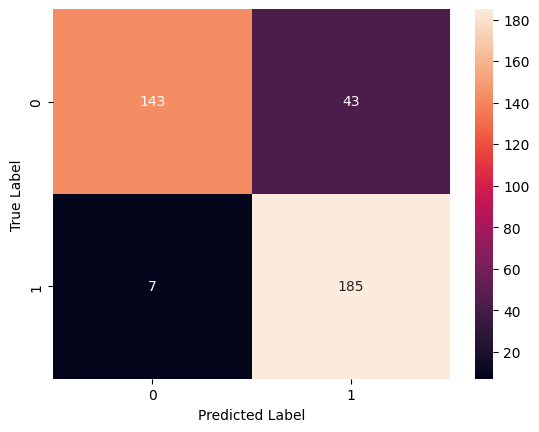

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(test['Label'], predictions)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Load and preprocess the data
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
list1 = [i for i in range(25)]
new_index = [str(i) for i in list1]
data.columns = new_index
for index in new_index:
    data[index] = data[index].str.lower()
    
train_headlines = []
for row in range(0, len(data.index)):
    train_headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
    
test_headlines = []
for row in range(0, len(test.index)):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row, 2:27]))

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_headlines)
train_sequences = tokenizer.texts_to_sequences(train_headlines)
test_sequences = tokenizer.texts_to_sequences(test_headlines)

train_data = pad_sequences(train_sequences, maxlen=100)
test_data = pad_sequences(test_sequences, maxlen=100)

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train['Label'], epochs=10, batch_size=64)

# Evaluate the model
scores = model.evaluate(test_data, test['Label'])
print("Accuracy: %.2f%%" % (scores[1]*100))
predictions = model.predict(test_data)
predictions = np.round(predictions)
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
report = classification_report(test['Label'], predictions)
print(report)


Epoch 1/10
63/63 [==============================] - 5s 62ms/step - loss: 0.6930 - accuracy: 0.5192
Epoch 2/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6837 - accuracy: 0.5683
Epoch 3/10
63/63 [==============================] - 3s 41ms/step - loss: 0.6720 - accuracy: 0.6073
Epoch 4/10
63/63 [==============================] - 3s 41ms/step - loss: 0.6508 - accuracy: 0.6699
Epoch 5/10
63/63 [==============================] - 4s 60ms/step - loss: 0.6110 - accuracy: 0.7326
Epoch 6/10
63/63 [==============================] - 3s 45ms/step - loss: 0.5274 - accuracy: 0.8035
Epoch 7/10
63/63 [==============================] - 3s 41ms/step - loss: 0.3861 - accuracy: 0.8797
Epoch 8/10
63/63 [==============================] - 3s 41ms/step - loss: 0.2216 - accuracy: 0.9509
Epoch 9/10
63/63 [==============================] - 3s 42ms/step - loss: 0.1079 - accuracy: 0.9829
Epoch 10/10
12/12 [==============================] - 0s 13ms/step - loss: 0.5044 - accuracy: 0.8228
Accuracy:

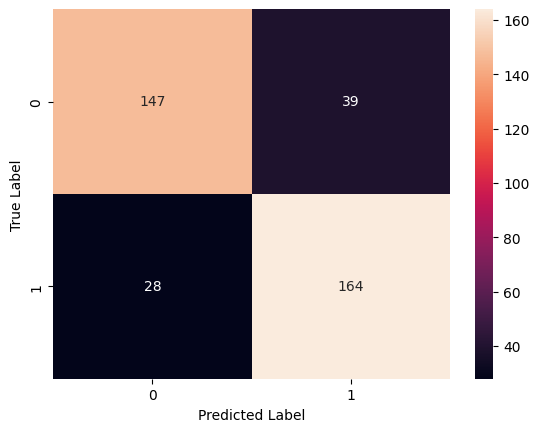

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(test['Label'], predictions)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Removing punctuations
data=train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# Numbering the columns
list1 = [i for i in range(25)]
new_index = [str(i) for i in list1]
data.columns = new_index
# Converting the text in lower case
for index in new_index:
    data[index] = data[index].str.lower()

headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer(ngram_range=(2, 2))
train_dataset = countvector.fit_transform(headlines)

type(train_dataset)

from sklearn.naive_bayes import MultinomialNB

naivebayes = MultinomialNB()
naivebayes.fit(train_dataset, train['Label'])

test_transform = []
for row in range(0, len(test.index)):
  test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = countvector.transform(test_transform)
predictions = naivebayes.predict(test_dataset)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[[138  48]
 [ 10 182]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



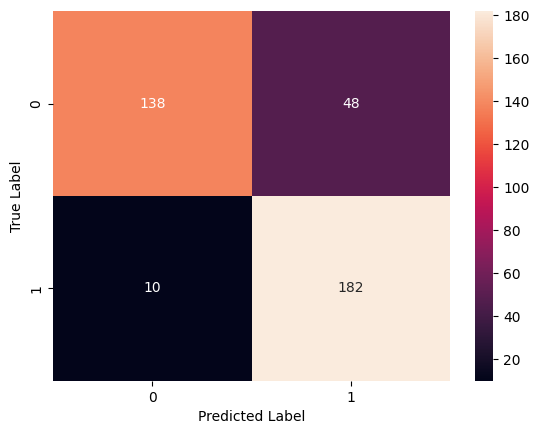

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(test['Label'], predictions)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

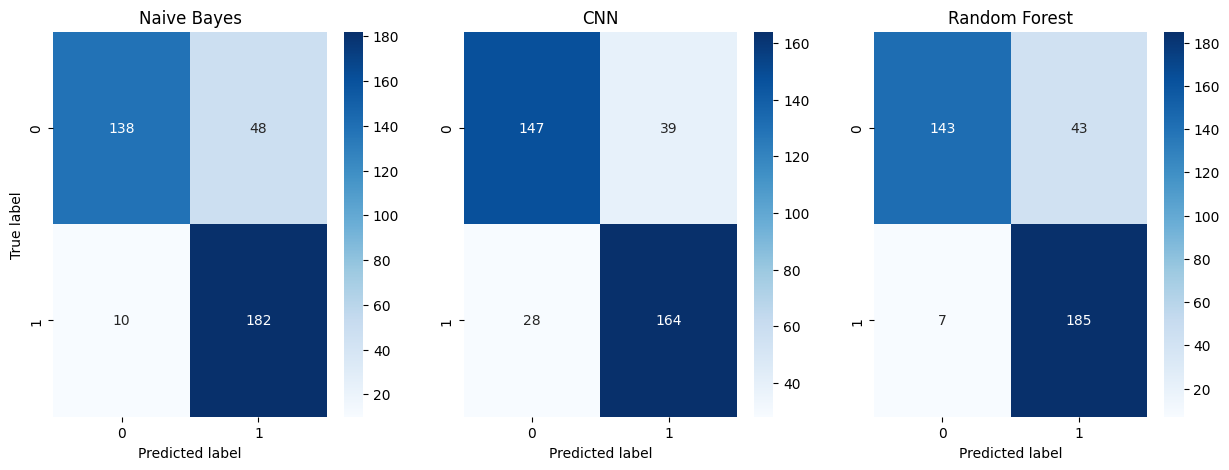

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
nb_cm = [[138, 48], [10, 182]]
cnn_cm = [[147, 39], [28, 164]]
rf_cm = [[143, 43], [7, 185]]

# Set up the figure with three subplots
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

# Plot the confusion matrix heatmaps
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt="d", ax=ax[0])
sns.heatmap(cnn_cm, annot=True, cmap="Blues", fmt="d", ax=ax[1])
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d", ax=ax[2])

# Set subplot titles
ax[0].set_title("Naive Bayes")
ax[1].set_title("CNN")
ax[2].set_title("Random Forest")

# Set y-axis label for the first subplot
ax[0].set_ylabel("True label")

# Set x-axis label for all subplots
for a in ax:
    a.set_xlabel("Predicted label")

# Display the plot
plt.show()


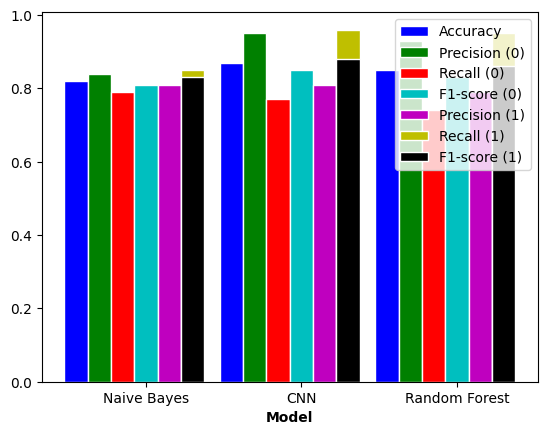

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and values
models = ['Naive Bayes', 'CNN', 'Random Forest']
accuracy = [0.82, 0.87, 0.85]
precision_0 = [0.84, 0.95, 0.93]
recall_0 = [0.79, 0.77, 0.74]
f1_0 = [0.81, 0.85, 0.83]
precision_1 = [0.81, 0.81, 0.79]
recall_1 = [0.85, 0.96, 0.95]
f1_1 = [0.83, 0.88, 0.86]

# Set the width of the bars
barWidth = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Create the bar plots
plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_0, color='g', width=barWidth, edgecolor='white', label='Precision (0)')
plt.bar(r3, recall_0, color='r', width=barWidth, edgecolor='white', label='Recall (0)')
plt.bar(r4, f1_0, color='c', width=barWidth, edgecolor='white', label='F1-score (0)')
plt.bar(r5, precision_1, color='m', width=barWidth, edgecolor='white', label='Precision (1)')
plt.bar(r6, recall_1, color='y', width=barWidth, edgecolor='white', label='Recall (1)')
plt.bar(r6, f1_1, color='k', width=barWidth, edgecolor='white', label='F1-score (1)')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(len(models))], models)

# Add a legend and show the plot
plt.legend()
plt.show()


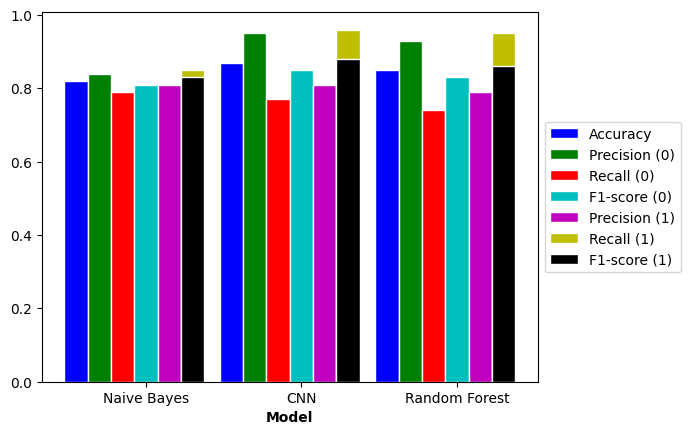

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and values
models = ['Naive Bayes', 'CNN', 'Random Forest']
accuracy = [0.82, 0.87, 0.85]
precision_0 = [0.84, 0.95, 0.93]
recall_0 = [0.79, 0.77, 0.74]
f1_0 = [0.81, 0.85, 0.83]
precision_1 = [0.81, 0.81, 0.79]
recall_1 = [0.85, 0.96, 0.95]
f1_1 = [0.83, 0.88, 0.86]

# Set the width of the bars
barWidth = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Create the bar plots
plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_0, color='g', width=barWidth, edgecolor='white', label='Precision (0)')
plt.bar(r3, recall_0, color='r', width=barWidth, edgecolor='white', label='Recall (0)')
plt.bar(r4, f1_0, color='c', width=barWidth, edgecolor='white', label='F1-score (0)')
plt.bar(r5, precision_1, color='m', width=barWidth, edgecolor='white', label='Precision (1)')
plt.bar(r6, recall_1, color='y', width=barWidth, edgecolor='white', label='Recall (1)')
plt.bar(r6, f1_1, color='k', width=barWidth, edgecolor='white', label='F1-score (1)')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(len(models))], models)

# Remove the default legend box
plt.legend().remove()

# Create a new legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()
